# Problem Set 6

See [Merge](https://datascience.quantecon.org/../pandas/merge.html), [Reshape](https://datascience.quantecon.org/../pandas/reshape.html), and [GroupBy](https://datascience.quantecon.org/../pandas/groupby.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Questions 1-7

Lets start with a relatively straightforward exercise before we get to the really fun stuff.

The following code loads a cleaned piece of census data from Statistics Canada.

In [2]:
df = pd.read_csv("https://datascience.quantecon.org/assets/data/canada_census.csv", header=0, index_col=False)
df.head()

,CDcode,Pname,Population,CollegeEducated,PercentOwnHouse,Income
0,1001,Newfoundland and Labrador,270350,24.8,74.1,74676
1,1002,Newfoundland and Labrador,20370,7.5,86.3,60912
2,1003,Newfoundland and Labrador,15560,7.3,86.0,56224
3,1004,Newfoundland and Labrador,20385,10.9,73.7,44282
4,1005,Newfoundland and Labrador,42015,17.0,73.9,62565


A *census division* is a geographical area, smaller than a Canadian province, that is used to
organize information at a slightly more granular level than by province or by city. The census
divisions are shown below.

![https://datascience.quantecon.org/_static/canada_censusdivisions_map.png](https://datascience.quantecon.org/_static/canada_censusdivisions_map.png)

  
The data above contains information on the population, percent of population with a college
degree, percent of population who own their house/apartment, and the median after-tax income at the
*census division* level.

Hint: The `groupby` is the key here.  You will need to practice different split, apply, and combine options.

### Question 1

Assume that you have a separate data source with province codes and names.

In [3]:
df_provincecodes = pd.DataFrame({
    "Pname" : [ 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
                'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
                'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories','Nunavut'],
    "Code" : ['NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'YT', 'NT', 'NU']
            })
df_provincecodes

,Pname,Code
0,Newfoundland and Labrador,NL
1,Prince Edward Island,PE
2,Nova Scotia,NS
3,New Brunswick,NB
4,Quebec,QC
5,Ontario,ON
6,Manitoba,MB
7,Saskatchewan,SK
8,Alberta,AB
9,British Columbia,BC


With this,

1. Either merge or join these province codes into the census dataframe to provide province codes for each province
  name. Hint: You need to figure out which “key” matches in the merge, and don’t be afraid to rename columns for convenience.  
1. Drop the province names from the resulting dataframe.  
1. Rename the column with the province codes to “Province”.  Hint: `.rename(columns = <YOURDICTIONARY>)`  

In [4]:

p1= pd.merge(df,df_provincecodes,on="Pname")
p23=p1.drop(columns="Pname").rename(columns={"Code":"Province"})
p23

,CDcode,Population,CollegeEducated,PercentOwnHouse,Income,Province
0,1001,270350,24.8,74.1,74676,NL
1,1002,20370,7.5,86.3,60912,NL
2,1003,15560,7.3,86.0,56224,NL
3,1004,20385,10.9,73.7,44282,NL
4,1005,42015,17.0,73.9,62565,NL
...,...,...,...,...,...,...
288,6105,6980,17.7,61.8,104302,NT
289,6106,20090,33.7,56.8,141700,NT
290,6204,18990,17.8,19.3,104896,NU
291,6205,10410,10.0,22.2,93294,NU


For this particular example, you could have renamed the column using `replace`. This is a good check.

In [5]:
(pd.read_csv("https://datascience.quantecon.org/assets/data/canada_census.csv", header=0, index_col=False)
.replace({
    "Alberta": "AB", "British Columbia": "BC", "Manitoba": "MB", "New Brunswick": "NB",
    "Newfoundland and Labrador": "NL", "Northwest Territories": "NT", "Nova Scotia": "NS",
    "Nunavut": "NU", "Ontario": "ON", "Prince Edward Island": "PE", "Quebec": "QC",
    "Saskatchewan": "SK", "Yukon": "YT"})
.rename(columns={"Pname" : "Province"})
.head()
)

,CDcode,Province,Population,CollegeEducated,PercentOwnHouse,Income
0,1001,NL,270350,24.8,74.1,74676
1,1002,NL,20370,7.5,86.3,60912
2,1003,NL,15560,7.3,86.0,56224
3,1004,NL,20385,10.9,73.7,44282
4,1005,NL,42015,17.0,73.9,62565


### Question 2

Which province has the highest population? Which has the lowest?

In [6]:
print("province for highest", p23.groupby("Province")["Population"].sum().idxmax())
print("province for lowest", p23.groupby("Province")["Population"].sum().idxmin())
#print("province for highest", p23.groupby("Province")["Population"].sum().max())


province for highest ON
province for lowest YT


### Question 3

Show a bar plot and a pie plot of the province populations.  Hint: After the split-apply-combine, you can use `.plot.bar()` or `.plot.pie()`.

<AxesSubplot:xlabel='Province'>

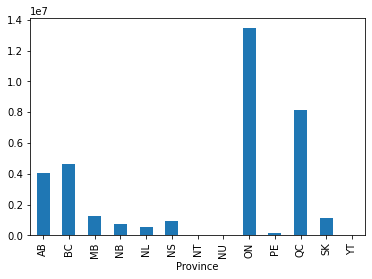

In [7]:
p23.groupby("Province")["Population"].sum().plot.bar()

<AxesSubplot:ylabel='Population'>

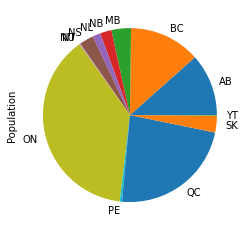

In [8]:
p23.groupby("Province")["Population"].sum().plot.pie()

### Question 3

Which province has the highest percent of individuals with a college education? Which has the
lowest?

Hint: Remember to weight this calculation by population!

In [9]:
pro_edu=p23.groupby("Province")["CollegeEducated"].sum()
weight=p23.groupby("Province")["Population"].sum()
weighted_pro_edu=pro_edu/weight

print(weighted_pro_edu.idxmax(),"has the highest percent of individuals with a college education")
print(weighted_pro_edu.idxmin(),"has the lowest percent of individuals with a college education")

NT has the highest percent of individuals with a college education
ON has the lowest percent of individuals with a college education


### Question 4

What is the census division with the highest median income in each province?

In [10]:
p23.groupby("Province")["Income"].median().idxmax()

'NT'

### Question 5

By province, what is the total population of census divisions where more than 80 percent of the population own houses ?

In [11]:
more= p23["PercentOwnHouse"]>80
p23[more].groupby("Province")["Population"].sum()

Province
AB     122155
BC      31445
MB     220595
NB     133995
NL     121425
NS      68585
ON    2915560
PE      17160
QC     508075
SK      36595
Name: Population, dtype: int64

### Question 6

By province, what is the average proportion of college-educated individuals in census divisions
where more than 80 percent of the population own houses?

In [12]:
sumof=p23[more].groupby("Province")["CollegeEducated"].sum()

coutofmore=p23[more].groupby("Province").count()["CollegeEducated"]

sumof/coutofmore

Province
AB    10.200000
BC    16.000000
MB    16.400000
NB    17.300000
NL     7.780000
NS    12.116667
ON    19.800000
PE    14.600000
QC    21.144444
SK    12.400000
Name: CollegeEducated, dtype: float64

### Question 7

Classify the census divisons as low, medium, and highly-educated by using the college-educated proportions,
where “low” indicates that less than 10 percent of the area is college-educated, “medium” indicates between 10 and 20 percent is college-educated, and “high” indicates more than 20 percent.

Based on that classification, find the average of income. Weight this average income by population for each of the low, medium, high education groups.

In [13]:
def high_medium_low(x):
    if x<10:
        return "low"
    elif x<=20:
        return "medium"
    elif x > 20:
        return "high"